![SegmentLocal](Images_StudIP/Logo2.png)

*Behavioral Data*


# Chapter 2.2: Statistical Analysis of behavioral data

<div class="alert alert-block alert-warning">
Make sure that you also downloaded the current version of the folder <b>Jupyter Notebooks ACC/Images_StudIP</b>, otherwise some of the descriptions will be incomplete.
</div>

<h1>Table of Contents<span class="tocSkip"></span></h1>

<div class="toc"><ul class="toc-item"><li><ul class="toc-item">
    <li><span><a href="#Prerequisites" data-toc-modified-id="Prerequisites-0.1"><span class="toc-item-num"></span>Prerequisites</a></span></li>
    <li><span><a href="#Scope-of-this-Sheet" data-toc-modified-id="Scope-of-this-Shee-0.2"><span class="toc-item-num"></span>Scope of this Sheet</a></span></li></ul></li>
    <li><span><a href="#1.-Experimental-designs" data-toc-modified-id="1.-Experimental-designs-1"><span class="toc-item-num"></span>1. Experimental designs</a></span><ul class="toc-item"><li><span><a href="#1.1-Repeated-Measures/-Within-group-design" data-toc-modified-id="1.1-Repeated-Measures/-Within-group-design-1.1"><span class="toc-item-num"></span>1.1 Repeated Measures/ Within group design</a></span></li><li><span><a href="#1.2-Independent-Measures/-Between-group-design" data-toc-modified-id="1.2-Independent-Measures/-Between-group-design-1.2"><span class="toc-item-num"></span>1.2 Independent Measures/ Between group design</a></span></li></ul></li><li><span><a href="#2.-Basics-of-hypothesis-testing" data-toc-modified-id="2.-Basics-of-hypothesis-testin-2"><span class="toc-item-num"></span>2. Basics of hypothesis testing</a></span><ul class="toc-item"><li><span><a href="#2.1-Null-hypothesis-/-Alternate-hypothesis" data-toc-modified-id="2.1-Null-hypothesis-/-Alternate-hypothesis-2.1"><span class="toc-item-num"></span>2.1 Null hypothesis / Alternate hypothesis</a></span></li><li><span><a href="#2.2-Types-of-statistical-tests" data-toc-modified-id="2.2-Types-of-statistical-tests-2.2"><span class="toc-item-num"></span>2.2 Types of statistical tests</a></span></li><li><span><a href="#2.3-Interpretation-of-statistical-tests" data-toc-modified-id="2.3-Interpretation-of-statistical-tests-2.3"><span class="toc-item-num"></span>2.3 Interpretation of statistical tests</a></span></li><li><span><a href="#2.4-Errors-in-statistical-tests" data-toc-modified-id="2.4-Errors-in-statistical-tests-2.4"><span class="toc-item-num"></span>2.4 Errors in statistical tests</a></span></li></ul></li><li><span><a href="#3.-Statistical-tests-on-behavioral-data" data-toc-modified-id="3.-Statistical-tests-on-behavioral-data-3"><span class="toc-item-num"></span>3. Statistical tests on behavioral data</a></span><ul class="toc-item"><li><span><a href="#3.1-Loading-the-preprocessed-behavioral-dataset" data-toc-modified-id="3.1-Loading-the-preprocessed-behavioral-dataset-3.1"><span class="toc-item-num"></span>3.1 Loading the preprocessed behavioral dataset</a></span></li><li><span><a href="#3.2-Student's-t-test" data-toc-modified-id="3.2-Student's-t-test-3.2"><span class="toc-item-num"></span>3.2 Student's t-test</a></span></li><li><span><a href="#3.3-Two-way-repeated-measures-ANOVA" data-toc-modified-id="3.3-Two-way-repeated-measures-ANOVA-3.3"><span class="toc-item-num"></span>3.3 Two-way repeated measures ANOVA</a></span></li></ul></li><li><span><a href="#Summary---What-you-should-have-learned" data-toc-modified-id="Summary---What-you-should-have-learned-3"><span class="toc-item-num"></span>Summary - What you should have learned</a></span></li><li><span><a href="#Citations" data-toc-modified-id="Citations-4"><span class="toc-item-num"></span>Citations</a></span></li></ul></div>

### Prerequisites
For this chapter, you should be familiar with the following concepts and techniques:
* Basic Python programming
* Working with Pandas
* Statistical analysis

### Scope of this Sheet

In this sheet we will finally analyse subsets of the behavioral data that we preprocessed and plotted in the previous sheet by means of statistcal analysis techniques. But before we can do this, we have to work through some important fundamentals. Please note that the fundamentals of statistics can easily fill a whole lecture and covering everything is impossible. But we hope to give you a good overview that will help you in your own research.

We will also work with [researchpy](https://researchpy.readthedocs.io/en/latest/), which directly calculates the degrees of freedom, the difference between the groups mean and a measure of effect size for a t-test. This is very convenient as all of this has to be calculated manually when using the usual ```stats.ttest``` functions.

To install researchpy open the Anaconda Prompt (Windows users) or the Terminal (Mac/Linux users) and run the following:
- ```conda activate acc```
- ```pip install researchpy```

## 1. Experimental designs

Experiments aim to predict the outcome of a (dependent) variable by introducing a change of one or more (independent) conditions. Experimental designs refer to how participants are allocated to these different conditions. 

For example, if there are 20 participants, the researcher must decide if all 20 participants will take part in both conditions (e.g. repeated measures) or if the participants will be split in half and take part in only one condition each (e.g. independent measures).

<div class="alert alert-block alert-info">
The choice of your experimental design is strongly influenced by your research question, so set up your research hypothesis before you design your experiment.
</div>

### 1.1 Repeated Measures/ Within group design

The same participants take part in each condition of the independent variable. <br> 
This means that each condition of the experiment includes the **same group of participants**. <br><br>

<img align="left" src="Images_StudIP/within_group_design.png" width="400">
<br><br><br><br><br><br><br><br><br><br><br><br><br>

**Advantages:**
- small sample sizes 
- reduces effect of individual variation 
- more statistical power


**Disadvantages:**
- no exposure bias (fatigue, boredom, learning)
- participants can figure out the outcome of the experiment

### 1.2 Independent Measures/ Between group design

Different participants are used in each condition of the independent variable. <br>
This means that each condition of the experiment includes a **different group of participants**. <br><br>

<img align="left" src="Images_StudIP/between_group_design.png" width="450">
<br><br><br><br><br><br><br><br><br><br><br><br><br>

**Advantages:**
- no exposure bias (fatigue, boredom, learning)
- low risk of participants figuring out the aim of the experiment
 
 
**Disadvantages:**
- large sample sizes are needed
- susceptible to individual differences

## 2. Basics of hypothesis testing

Hypothesis testing is a form of inferential statistics that allows us to draw conclusions about an entire population based on a representative sample. You gain tremendous benefits by working with a sample, as in most cases, it is simply impossible to observe the entire population. 

But to be able to draw conclusions from a representative example involves some important steps as formulating hypotheses and choosing the correct statistical tests. In general, it can be helpful to follow these essential steps:

- State the null hypothesis.
- State the alternative hypothesis.
- Choose what kind of statistical test you need to perform.
- Either support or reject the null hypothesis based on the results of your statistical test.


### 2.1 Null hypothesis / Alternate hypothesis

Hypothesis testing uses sample data to assess two mutually exclusive theories about the properties of a population. Statisticians call these theories the null hypothesis ($H_{0}$) and the alternative hypothesis ($H_{1}$). Typically, the null hypothesis states that there is no effect. You can think of the null hypothesis as the default theory that requires sufficiently strong evidence against in order to reject it. The alternative hypothesis states that a population parameter does not equal the null hypothesis value. If your sample contains sufficient evidence, you can reject the null hypothesis and favor the alternative hypothesis. 

Imagine the study testing if the performance on an exam is affected by the hours of study (5 hours/week or 10 hours/week). We thus want to see the effects of hours of study on the exam performance, testing the following hypothesis:

**Dependent variable:** performance on exam <br>
**Independent variable:** hours of study (5 hours/week / 10 hours/week)

$H_{0}$: There is no difference in average performance for any level of hours of study. <br>
$H_{1}$: There is a difference in average performance by hours of study.

### 2.2 Types of statistical tests

After we have stated our null and alternative hypothesis, we need to perform a suitable statistical test to determine whether or not the null hypothesis can be rejected. Depending on the kind of data we want to analyze, there are different statistical tests that have to be considered. Please keep in mind that every test has certain assumptions, that the data must meet in order for the test results to be valid (as you will later see in the [student's t-test](#assumptions_t-test) and the [two-way repeated measures ANOVA](#assumptions_ANOVA)). So make sure that you first check if all assumptions are fulfilled!

<a id='statistical_tests'></a>
<img align="left" src="Images_StudIP/overview_statistical_tests.png" width="600">

To get a better understanding of what a t-test and ANOVA do, we highly recommend to watch the respective <a href="https://www.youtube.com/user/joshstarmer">StatQuest's videos</a>, as these are the most commonly used statistical tests.

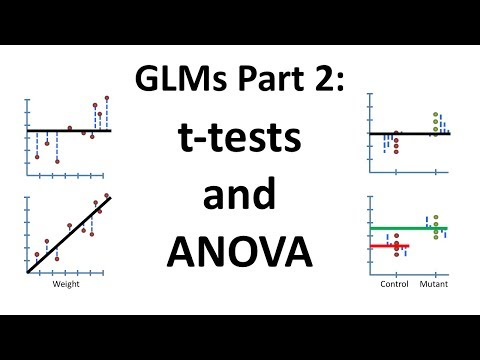

In [1]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('NF5_btOaCig', width=700, height=400)

### 2.3 Interpretation of statistical tests

The results of a statistical hypothesis test must be interpreted for us to start making claims whether or not $H_{0}$ can be rejected. There are two common forms that a result from a statistical hypothesis test may take, and they must be interpreted in different ways. They are the p-value and critical values.


**Interpretation of p-values:**

P-values tell you how strongly your sample data contradict the null hypothesis. Lower p-values represent stronger evidence against the null hypothesis. You use p-values in conjunction with the significance level (alpha) to determine whether your data favor the null or alternative hypothesis.

A common value used for alpha is 5% or 0.05. A smaller alpha value suggests a more robust interpretation of the null hypothesis, such as 1% or 0.1%. The p-value is then compared to the pre-chosen alpha value. A result is statistically significant when the p-value is less than alpha. This signifies that a change was detected: that the default hypothesis can be rejected.

- **If p-value $>$ alpha:** Fail to reject the null hypothesis (i.e. not significant result). <br>
- **If p-value $\leq$ alpha:** Reject the null hypothesis (i.e. significant result).

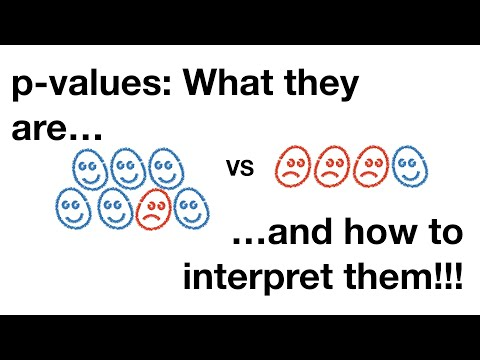

In [2]:
YouTubeVideo('vemZtEM63GY', width=700, height=400)

**Interpretation of critical values:**

Some tests do not return a p-value. Instead, they might return a list of critical values and their associated significance levels, as well as a test statistic. These are usually nonparametric or distribution-free statistical hypothesis tests.

The results are interpreted in a similar way. Instead of comparing a single p-value to a pre-specified significance level, the test statistic is compared to the critical value at a chosen significance level.

- **If test statistic $<$ critical value:** Fail to reject the null hypothesis. <br>
- **If test statistic $\geq$ critical value:** Reject the null hypothesis.

Again, the meaning of the result is similar in that the chosen significance level is a probabilistic decision on rejection or fail to reject the base assumption of the test given the data.

### 2.4 Errors in statistical tests

A word of warning: Statistical hypothesis tests are not 100% accurate because they use a random sample to draw conclusions about entire populations. There are two types of errors related to drawing an incorrect conclusion.

**False positives:**

You reject a null hypothesis that is true. Statisticians call this a **Type I error**. The Type I error rate equals your significance level (alpha). Typically alpha of 0.05 is used to conclude that a statistical test has 5% chance of getting a type-I error

**False negatives:** 

You fail to reject a null hypothesis that is false. Statisticians call this a **Type II error**. Generally, you do not know the Type II error rate. However, it is a larger risk when you have a small sample size, noisy data, or a small effect size. The type II error rate is also known as beta.


## 3. Statistical tests on behavioral data

Finally, we come back to our behavioral dataset, that we preprocessed and cleaned in the previous sheet. By looking at different subsets of this data we will perform common statistical tests, as a t-test and a repeated measures ANOVA. Since the data is from a real experiment and not optimized for this course, we may have to overlook violations of certain assumtions (e.g. normal distribution) in order to present you the whole process of a statistical test.

If you are interested in the actual outcome of this experiment have a look at the [paper](https://www.frontiersin.org/articles/10.3389/fpsyg.2019.00361/full)'s results section. As the experimenters had to cover both fixed effects and random effects in their analysis they used a linear mixed model, which is often preferred over more traditional approaches such as repeated measures ANOVA.

In [1]:
import numpy as np
import pandas as pd
import researchpy as rp
import statsmodels.api as sm
import matplotlib.pyplot as plt

from scipy import stats
from statsmodels.stats.anova import AnovaRM

### 3.1 Loading the preprocessed behavioral dataset

Make sure that you downloaded the file *behavioral_data_preprocessed.csv* from StudIP's filestation/files and stored it in the same directory as this notebook.

In [2]:
# Load behavioral dataset
df = pd.read_csv("behavioral_data_preprocessed.csv")

In [3]:
# Take a look at the head of the data frame
df.head()

,subject_ID,target,position,answer_position,time,answer,feedback,trial,condition,block,change,group,task
0,0,46,2,2,1.295453,1,0.00,1,comp,1,15.0,434,player_ori
1,0,29,1,2,1.185209,0,0.00,2,comp,1,15.0,434,player_ori
2,0,48,0,0,0.729091,1,0.05,3,comp,1,15.0,434,player_ori
3,0,120,3,3,1.206738,1,0.00,4,comp,1,15.0,434,player_ori
4,0,48,0,2,1.282198,0,-0.05,5,comp,1,15.0,434,player_ori


### 3.2 Student's t-test

Lets assume, we want to test whether subjects perform better in an orientation discrimination task than in a spatial discrimination task. Therefore we splitted 50 subjects into two groups of 25 and let each group perform either an orientation discrimination task or a spatial discrimination task. With the gathered data we want to test the following hypothesis:

$H_{0}$: There is no difference in average response time for orientation discrimination tasks and spatial discrimination tasks. <br>
$H_{1}$: There is a difference in average response time for orientation discrimination tasks and spatial discrimination tasks.

<a id='assumptions_t-test'></a>
As we want to compare the means of two **independent** groups (orientation/spatial) given a **continuous** outcome variable (response time), we should perform a student's t-test according to the [table](#statistical_tests) of statistical tests. Like every test, this inferential statistic test has assumptions, that the data must meet in order for the test results to be valid:

- The means of the two groups being compared should follow normal distributions.
- The two populations being compared should have the same variance.

So before we can perform the student's t-test we have to check if we fulfill these assumptions. But first we need to filter our data:

- Filter the dataframe for competitive trials (condition = comp).
- Calculate the response time per subject per task of the filtered dataframe. You have to group the data according to the different subjects and tasks and calculate the mean response time.
- Split the grouped data into 2 dataframes, i.e. one dataframe contains data of the orientation discrimination task (task = player_ori), the other dataframe contains data of the spatial discrimination task (task = player_spatial).

In [41]:
# For all statistical tests we assume alpha = 0.05
alpha = 0.05

# TODO: Filter for competitive trials
df_comp = df[df['condition'] == 'comp']

# TODO: Calculate the mean response times per subject per task
rt_task = df_comp.groupby(['subject_ID','task'], as_index = False)['time'].mean()

# TODO: Create 2 dataframes, one for the data of the orientation discrimination task,
#       one for the data of the spatial discrimination task
rt_task_ori = rt_task[rt_task['task'] == 'player_ori']
rt_task_spa = rt_task[rt_task['task'] == 'player_spatial']

Now we will check if our data is normally distributed.

- For each of the 2 dataframes create a QQ-plot for the response times. The dots should fall on the red line. If the dots are not on the red line then it’s an indication that there is deviation from normality. Some deviations from normality is fine, as long as it’s not severe. Tipp: Take a look at [statsmodel.qq-plot()](https://www.statsmodels.org/dev/generated/statsmodels.graphics.gofplots.qqplot.html) (or at the solution of the previous sheet). 
- Perform a formal test on normality via a Shapiro-Wilk test. Tipp: Take a look at [stats.shapiro()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html). It tests the null hypothesis that the samples are normally distributed and returns a test statistic and a p-value. The normality criterion holds true when p > alpha.


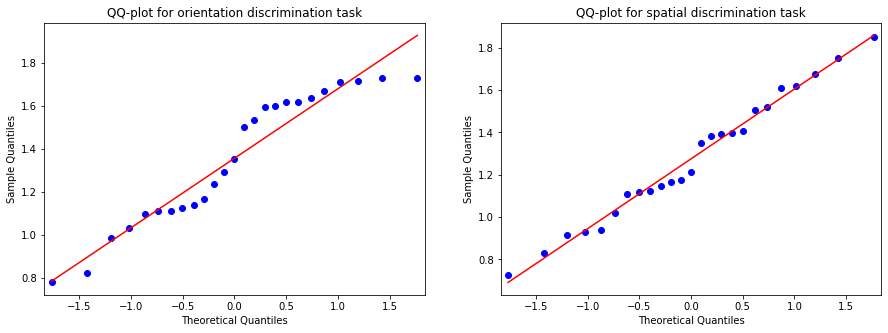

stat_o=0.903, p_o=0.022
Probably not Gaussian
stat_s=0.977, p_s=0.823
Probably Gaussian


In [69]:
# TODO: Create QQ-plots for the response times
fig, axes = plt.subplots(1, 2, figsize = (15,5))
sm.qqplot(rt_task_ori['time'], line = 'r', ax = axes[0])
sm.qqplot(rt_task_spa['time'], line = 'r', ax = axes[1])
axes[0].set(title = 'QQ-plot for orientation discrimination task')
axes[1].set(title = 'QQ-plot for spatial discrimination task')

plt.show()

# TODO: Perform Shapiro-Wilk normality tests
    
stat_o, p_o = stats.shapiro(rt_task_ori['time'])

print('stat_o={:0.3f}, p_o={:0.3f}'.format(stat_o, p_o))
if p_o > alpha:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')
    
    
stat_s, p_s = stats.shapiro(rt_task_spa['time'])

print('stat_s={:0.3f}, p_s={:0.3f}'.format(stat_s, p_s))
if p_s > alpha:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')


Lets have a look if the variances are equal.

- Perform a Levene’s test for homogeneity of variance. Tipp: Take a look at [stats.levene()](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.levene.html). It tests the null hypothesis that all samples come from populations with equal variances and returns a test statistic and a p-value. The variance criterion holds true when p > alpha. 
- Hint: You need to give this function only two parameters: 
 + sample1 = response time of orientation discrimination task 
 + sample2 = response time of spatial discrimination task

In [72]:
# TODO: Perform a Levene’s test for homogeneity of variance
test_statistic, p_value = stats.levene(rt_task_ori['time'], rt_task_spa['time'])

print('test statistic is {:0.3f}, p-value is {:0.3f}'.format(test_statistic, p_value))
if p_value > alpha:
    print('it seems all samples come from populations with equal variances')
else:
    print("it doesn't seem all samples come from populations with equal variances")

test statistic is 0.206, p-value is 0.652
it seems all samples come from populations with equal variances


Independent of the actual outcome of these tests, we simply assume that our data is approximately normally distributed and the variances are equal. Thus, we are now good to perform a student's t-test to check whether $H_{0}$ can be rejected:

- Perform a student's t-test (a.k.a. independent sample t-test) and print the summary statistics and test results. To do this have a closer look at pysearch's [ttest()](https://researchpy.readthedocs.io/en/latest/ttest_documentation.html) function and especially the description of the returned results.

In [75]:
# TODO: Perform a student's t-test
ttest = rp.ttest(rt_task_ori['time'], rt_task_spa['time'])

In [76]:
# TODO: Print the summary statistics
ttest[0]

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,time,25.0,1.355600,0.303658,0.060732,1.230256,1.480944
1,time,25.0,1.274744,0.300876,0.060175,1.150548,1.398939
2,combined,50.0,1.315172,0.301944,0.042701,1.229360,1.400984


In [77]:
# TODO: Print the test results
ttest[1]

,Independent t-test,results
0,Difference (time - time) =,0.0809
1,Degrees of freedom =,48.0000
2,t =,0.9457
3,Two side test p value =,0.3490
4,Difference < 0 p value =,0.8255
5,Difference > 0 p value =,0.1745
6,Cohen's d =,0.2675
7,Hedge's g =,0.2633
8,Glass's delta =,0.2663
9,r =,0.1353


### 3.3 Two-way repeated measures ANOVA

Lets assume, we want to test whether subjects perform better in a competitive spatial discrimination task than in a cooperative spatial discrimination task and whether correct answers are faster than incorrect answers. Therefore we let our 25 subjects perform both a competitive spatial discrimination task and a cooperative spatial discrimination task that were adjusted in difficulty such that participants were expected to attain a 50% accuracy. With the gathered data we want to test the following hypotheses:

**Factor condition x factor correctness interaction:** <br>
$H_{0}$: There is no interaction effect between the factors condition and correctness. <br>
$H_{1}$: There is an interaction effect between the factors condition and correctness.

**Main effect of factor condition:** <br>
$H_{0}$: There is no difference in average response time for competitive tasks and cooperative tasks. <br>
$H_{1}$: There is a difference in average response time for competitive tasks and cooperative tasks.

**Main effect of factor correctness:** <br>
$H_{0}$: There is no difference in average response time for correct and incoorect answers. <br>
$H_{1}$: There is a difference in average response time for correct and incoorect answers.

<a id='assumptions_ANOVA'></a>
As we want to compare the means of four **dependent** groups (competitive-correct, competitive-incorrect, cooperative-correct, cooperative-incorrect) given a **continuous** outcome variable (response time), we should perform a repeated measures ANOVA according to the [table](#statistical_tests) of statistical tests. The assumptions that the data must meet in order for the test results to be valid are:

- The distribution of the dependent variable in the two or more related groups should be approximately normally distributed.
- Known as sphericity, the variances of the differences between all combinations of related groups must be equal. 

Before we can perform the two-way repeated measures ANOVA we need to filter our data: 

- Filter the dataframe for spatial discrimination tasks (task = player_spatial).
- Using the filtered dataframe, calculate the response time per subject, answer and condition. You have to group the data according to the different subjects, answers and conditions and calculate the mean response time.

In [89]:
# For all statistical tests we assume alpha = 0.05
alpha = 0.05

# TODO: Filter for spatial discrimination tasks
player_spatial = df[df['task'] == 'player_spatial']

# TODO: Calculate the mean response times per subject, answer and condition
spatial_sorted = player_spatial.groupby(['subject_ID', 'answer', 'condition'], as_index = False)['time'].mean()
print(spatial_sorted)


    subject_ID  answer condition      time
0           25       0      comp  1.511960
1           25       0      coop  1.542155
2           25       1      comp  1.112387
3           25       1      coop  1.152606
4           26       0      comp  1.372130
..         ...     ...       ...       ...
95          48       1      coop  1.360336
96          49       0      comp  1.355175
97          49       0      coop  1.446672
98          49       1      comp  1.347699
99          49       1      coop  1.400925

[100 rows x 4 columns]


Now we will check if our data is normally distributed.

- Split the grouped data into 4 dataframes, one for each group (competitive-correct, competitive-incorrect, cooperative-correct, cooperative-incorrect). Tipp: You can select rows in a dataframe by multiple conditions. [Here](https://thispointer.com/python-pandas-select-rows-in-dataframe-by-conditions-on-multiple-columns/) you can find some useful examples.
- For each of the 4 dataframes perform a formal test on normality via a Shapiro-Wilk test. 

In [117]:
# TODO: Create 4 dataframes (competitive-correct, competitive-incorrect, 
#                            cooperative-correct, cooperative-incorrect)
comp_cor = spatial_sorted[(spatial_sorted['condition'] == 'comp') & (spatial_sorted['answer'] == 1)]
comp_inc = spatial_sorted[(spatial_sorted['condition'] == 'comp') & (spatial_sorted['answer'] == 0)]
coop_cor = spatial_sorted[(spatial_sorted['condition'] == 'coop') & (spatial_sorted['answer'] == 1)]
coop_inc = spatial_sorted[(spatial_sorted['condition'] == 'coop') & (spatial_sorted['answer'] == 0)]

# TODO: Perform a Shapiro-Wilk normality test for each group
groups = [comp_cor['time'], comp_inc['time'], coop_cor['time'], coop_inc['time']]
names = ['comp_cor', 'comp_cor', 'comp_cor', 'comp_cor']

for i in range(len(groups)):
    st, p = stats.shapiro(groups[i])
    print('{}: stat: {:0.3f}, p: {:0.3f}.'.format(names[i], s, p))
    if p > alpha:
        print('Probably Gaussian')
    else:
        print('Probably not Gaussian') 

AttributeError: 'numpy.float64' object has no attribute 'shapiro'

Lets have a look a the sphericity.

- Extract the response times of the 4 dataframes (dependent groups) and calculate the differences between all combinations of these groups. Tipp: You can transform a pandas series into a numpy array with the [to_numpy()](https://pandas.pydata.org/pandas-docs/version/0.25.0/reference/api/pandas.DataFrame.to_numpy.html) function.  
- The variances of the calculated differences can then be tested via Levene’s test for homogeneity of variance.

In [119]:
# TODO: Extract the response times
cpc = comp_cor['time'].to_numpy()
cpi = comp_inc['time'].to_numpy()
coc = coop_cor['time'].to_numpy()
coi = comp_inc['time'].to_numpy()

# TODO: Calculate the differences between all combinations and test it via Levene's test
stat, p = stats.levene(cpc-cpi, cpc-coc, cpc-coi, cpi-coc, cpi-coi, coc-coi)
print('statistic: {:0.3f}, p-value: {:0.3f}'.format(stat, p))

if p > alpha:
    print('Sphericity is probably given')
else:
    print('Sphericity is probably not given')

AttributeError: 'numpy.float64' object has no attribute 'levene'

Independent of the actual outcome of these tests, we simply assume that our data is approximately normally distributed and that sphericity is given. Thus, we are now good to perform a repeated measures ANOVA:

- Perform a two-way repeated measures ANOVA and print the ANOVA table. To do this have a closer look at the statsmodels' [AnovaRM()](https://www.statsmodels.org/stable/generated/statsmodels.stats.anova.AnovaRM.html) function and this [tutorial](https://www.marsja.se/repeated-measures-anova-in-python-using-statsmodels/). Tipp: We have a **two-way** repeated measures ANOVA which means that we have **two within-subject factors: correctness and condition**.

In [130]:
# TODO: Perform a two-way repeated measures ANOVA (Pr > F = p-value)
aovrm = AnovaRM(spatial_sorted,'time', 'subject_ID', within=['condition', 'answer'], aggregate_func = 'mean')
fit = aovrm.fit()
fit.summary()


,F Value,Num DF,Den DF,Pr > F
condition,0.4458,1.0000,24.0000,0.5107
answer,21.9021,1.0000,24.0000,0.0001
condition:answer,0.4383,1.0000,24.0000,0.5142


<div class="alert alert-block alert-info">
With a multi-factor model, the significance of the interaction should be tested as the first step. If the interaction is significant, the sole main effects of factor A or factor B are not really interpretable by themselves since the significant interaction indicates that the effect of factor A depends on the level of factor A and the the level of factor B, and vice versa.
</div>

## Summary - What you should have learned

Congratulations, you've mastered the second behavioral data chapter! By now you should be familiar with the following:

* The correct selection of a statistical hypothesis test requires several assumption tests.
* The interpretation of a statistical hypothesis test requires a correct understanding of p-values.
* Regardless of the significance level, the finding of hypothesis tests may still contain errors.

## Citations

- Czeszumski A, Ehinger B, Wahn B, and König P (2019) The social situation affects how we process feedback about our actions. Frontiers in Psychology, 10:361. https://doi.org/10.3389/fpsyg.2019.00361